# Mall Customer Speding Analysis with Clustering

## Import data from csv file

In [2]:
import pandas as pd 
cust_data = pd.read_csv(r"data/Mall_Customers.csv")
display(cust_data.head())

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Statistical Data Analysis

## Check variables information

In [3]:
print(cust_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


## Check variables statistical properties

In [4]:
print(cust_data.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


## Check duplicate values

In [5]:
cust_data.duplicated().sum()

0

## Check unique values in each variable

In [8]:
max_col_name_length = max([len(str(col)) for col in cust_data.columns])

for col in cust_data.columns:
    print("{:30} {} Unique count".format(col, len(cust_data[col].unique())))
          
    # print(f"Variable: {str(col).ljust(max_col_name_length)} Unique Values: {len(cust_data[col].unique())}")

CustomerID                     200 Unique count
Gender                         2 Unique count
Age                            51 Unique count
Annual Income (k$)             64 Unique count
Spending Score (1-100)         84 Unique count


# Exploratory Data Analsysis

## Gender bar plot

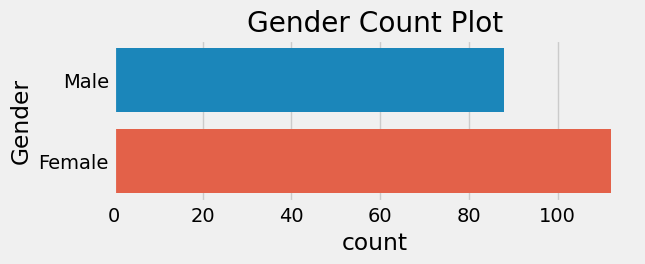

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

plt.style.use('fivethirtyeight')
fig = plt.figure(1, figsize = (6, 2))

sns.countplot(y='Gender', data=cust_data)
plt.title("Gender Count Plot")
plt.show()
plt.close()


## Pair plot
**Observations-**

While there is no discernible cluster based on gender, there are indications of clustering when examining the relationship between annual income and spending score. This suggests that customers can be segmented based on their income and spending behavior. By analyzing the data, we can identify different customer segments with varying spending patterns. This information can be leveraged to tailor marketing strategies and optimize business decisions, ultimately improving customer satisfaction and profitability.

In [57]:
cust_data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

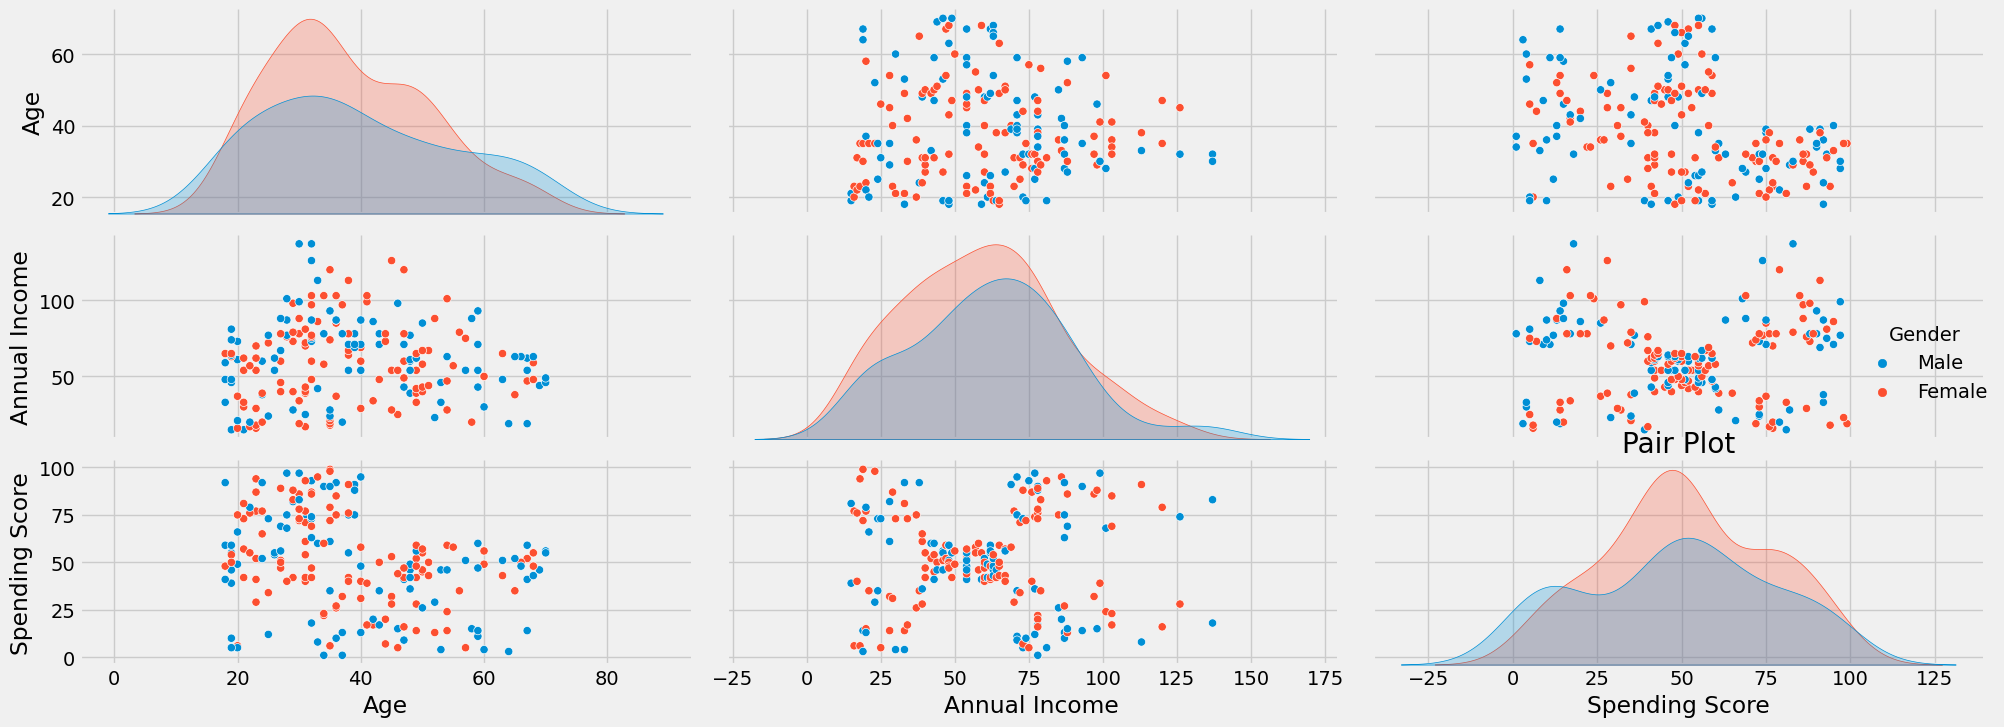

In [58]:
# sns.pairplot(data=cust_data.drop('CustomerID', axis=1), hue='Gender', aspect=2.5)
sns.pairplot(data=cust_data.rename(columns={"Annual Income (k$)":"Annual Income", "Spending Score (1-100)":"Spending Score"}).drop('CustomerID', axis=1), hue='Gender', aspect=2.5)
plt.tight_layout()
plt.title("Pair Plot")
plt.savefig("Pair Plot.jpg")
plt.show()
plt.close()

## Distribution of - Age, Annual income and Spending score

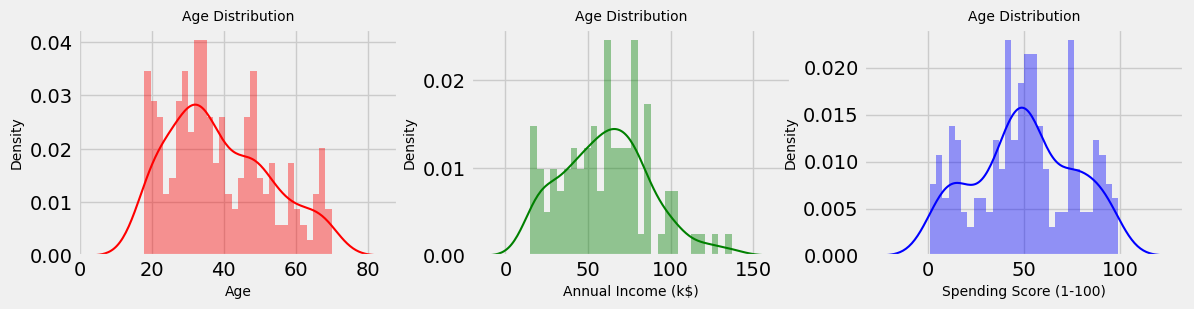

In [49]:
# Create subgraph.
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,3))

plt.style.use('fivethirtyeight')
plt.tight_layout()

sns.distplot(cust_data['Age'], ax=ax1, kde_kws={'linewidth': 1.5}, color='red', bins=30)
ax1.set_title("Age Distribution", fontsize=10)
ax1.set_xlabel(xlabel='Age', fontsize=10)
ax1.set_ylabel(ylabel='Density', fontsize=10)

sns.distplot(cust_data['Annual Income (k$)'], ax=ax2,kde_kws={'linewidth': 1.5}, color='green', bins=30)
ax2.set_title("Age Distribution", fontsize=10)
ax2.set_xlabel(xlabel='Annual Income (k$)', fontsize=10)
ax2.set_ylabel(ylabel='Density', fontsize=10)

sns.distplot(cust_data['Spending Score (1-100)'], ax=ax3, kde_kws={'linewidth': 1.5}, color='blue',bins=30)
ax3.set_title("Age Distribution", fontsize=10)
ax3.set_xlabel(xlabel='Spending Score (1-100)', fontsize=10)
ax3.set_ylabel(ylabel='Density', fontsize=10)

plt.savefig("Distribution plot.jpg")
plt.show()

# Select variables for the clustering

In [34]:
variables_for_custering = cust_data[['Annual Income (k$)','Spending Score (1-100)']].values

# See top 10 rows
variables_for_custering[:10]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72]], dtype=int64)

# Data Preprocessing

## Normalization 

In [35]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
variables_for_custering_norm = min_max_scaler.fit_transform(variables_for_custering)

# Show first 10 entries 
variables_for_custering_norm[:10]

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918],
       [0.01639344, 0.76530612],
       [0.02459016, 0.05102041],
       [0.02459016, 0.94897959],
       [0.03278689, 0.02040816],
       [0.03278689, 0.7244898 ]])

# Train ML Algorithm 

## Find out optimal number of clusters with Knee method
**Obsevation**

5 is the knee point suggest that 5 is the optimal number of clusters.

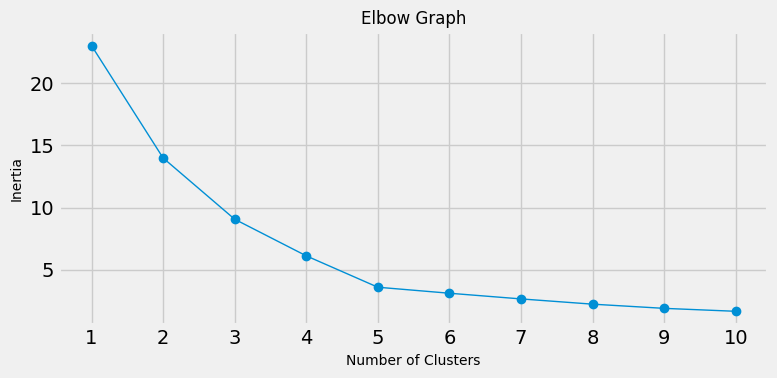

In [48]:
from sklearn.cluster import KMeans

result = []

for no_of_clusters in range(1,11):
    kmeans = KMeans(n_clusters=no_of_clusters, n_init=10, init="k-means++", random_state=1 )
    kmeans.fit(variables_for_custering_norm) 
    result.append(kmeans.inertia_) 

# Resize the graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), result, marker='o',  linewidth=1)
plt.xticks(range(1, 11)) 
plt.xlabel('Number of Clusters',fontsize=10)
plt.ylabel('Inertia', fontsize=10)
plt.title('Elbow Graph', fontsize=12)
plt.tight_layout()
plt.savefig("Elbow Graph.jpg")
plt.show()

## Train the k-means algorithm with 5 clusters.

In [40]:
kmeans = KMeans(n_clusters=5, n_init=10, init="k-means++",random_state=1)

# Make Prediction

In [41]:
predictions = kmeans.fit_predict(variables_for_custering_norm)
cluster_centers = kmeans.cluster_centers_
predictions

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1,
       3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 4, 0, 1, 0, 4, 0, 4, 0,
       1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0])

## See clusters

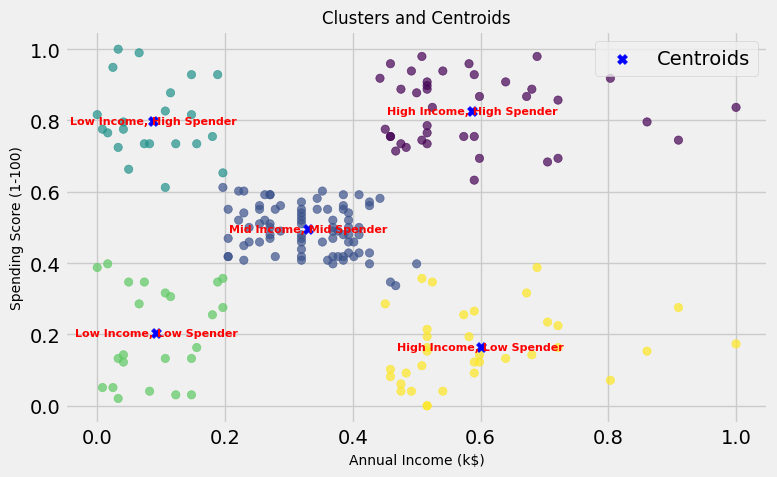

In [47]:
# Create the scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(variables_for_custering_norm[:, 0], variables_for_custering_norm[:, 1], c=predictions, cmap='viridis', alpha=0.7)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='blue', marker='X', s=50, label='Centroids')

# Add labels to each cluster
labels = ['High Income, High Spender',  'Mid Income, Mid Spender', 'Low Income, High Spender', 'Low Income, Low Spender', 'High Income, Low Spender']

for i, centroid in enumerate(cluster_centers):
    plt.text(centroid[0], centroid[1], labels[i], fontweight='bold', color='red', fontsize=8, ha='center', va='center', )

    
plt.xlabel('Annual Income (k$)', fontsize=10)
plt.ylabel('Spending Score (1-100)', fontsize=10)
plt.title('Clusters and Centroids', fontsize=12)
plt.legend()
plt.tight_layout()
plt.savefig("Clusters.jpg")
plt.show()